# Data


In [351]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [352]:
Uniswap_data = yf.download("UNI7083-USD", start="2020-11-30", end="2022-11-30")

[*********************100%***********************]  1 of 1 completed


In [353]:
Uniswap_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-30,3.551944,3.804333,3.537390,3.769074,3.769074,824763850
2020-12-01,3.772612,3.975911,3.476761,3.555413,3.555413,1042619601
2020-12-02,3.555058,4.168473,3.513476,3.936940,3.936940,729926104
2020-12-03,3.940070,4.019715,3.808588,3.891982,3.891982,587622999
2020-12-04,3.892268,3.916185,3.507199,3.528132,3.528132,595341444


In [354]:
Uniswap_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-25,5.450436,5.489812,5.304820,5.415577,5.415577,77274241
2022-11-26,5.415301,5.606520,5.387432,5.417106,5.417106,81048785
2022-11-27,5.417247,5.602565,5.405514,5.405514,5.405514,56174067
2022-11-28,5.405803,5.451716,5.179497,5.293201,5.293201,69123900
2022-11-29,5.292975,5.519847,5.269591,5.460513,5.460513,62922689


In [355]:
Uniswap = Uniswap_data['Adj Close']
Uniswap.tail()

Date
2022-11-25    5.415577
2022-11-26    5.417106
2022-11-27    5.405514
2022-11-28    5.293201
2022-11-29    5.460513
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

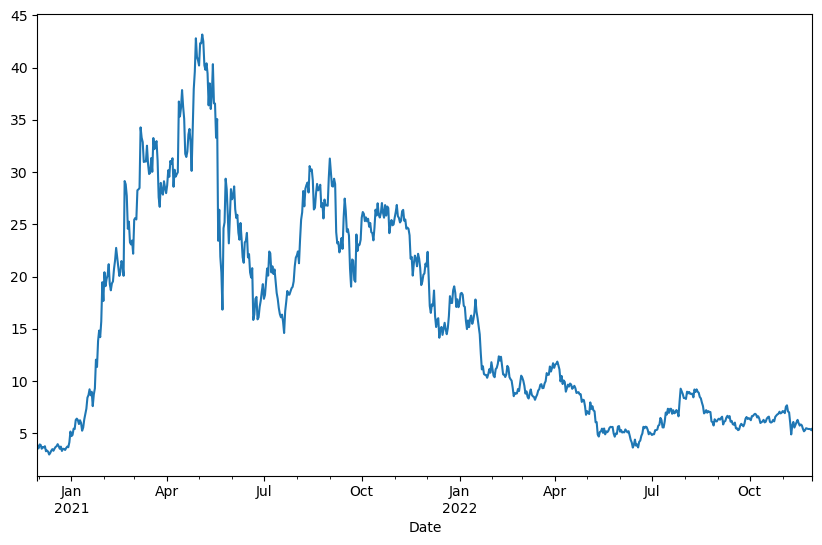

In [356]:
Uniswap.plot(figsize=(10, 6), subplots=True)

In [357]:
Uniswap_data3m=Uniswap_data[-92:-1]
Uniswap_data3m.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-30,6.343274,6.439431,5.958754,6.163016,6.163016,133870344
2022-08-31,6.164805,6.397779,6.126834,6.141360,6.141360,162756867
2022-09-01,6.141596,6.338459,5.980062,6.320145,6.320145,118952593
2022-09-02,6.320402,6.662852,6.225031,6.401448,6.401448,132619219
2022-09-03,6.400417,6.401010,6.247279,6.303452,6.303452,71692111


In [371]:
Uniswap_data3m.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-24,5.488478,5.570862,5.400441,5.451311,5.451311,83315692
2022-11-25,5.450436,5.489812,5.304820,5.415577,5.415577,77274241
2022-11-26,5.415301,5.606520,5.387432,5.417106,5.417106,81048785
2022-11-27,5.417247,5.602565,5.405514,5.405514,5.405514,56174067
2022-11-28,5.405803,5.451716,5.179497,5.293201,5.293201,69123900


In [372]:
Uniswap = Uniswap_data['Adj Close']
Uniswap.tail()

Date
2022-11-25    5.415577
2022-11-26    5.417106
2022-11-27    5.405514
2022-11-28    5.293201
2022-11-29    5.460513
Name: Adj Close, dtype: float64

In [527]:
log_return = np.log(Uniswap_data3m['Adj Close'] / Uniswap_data3m['Adj Close'].shift(1))
vol = np.sqrt(365) * log_return.std()

print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 97.28 %


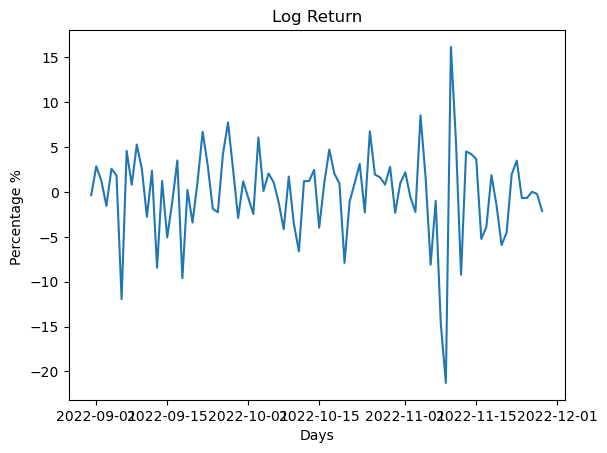

In [528]:
fig = plt.figure()
plt.plot(log_return * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

# Methodology

In [529]:
##Binomial Tree

In [531]:
S0=5.460                # spot stock price
K=6                 #strike price
T=3/12              #time to maturity
r=0.0423           #interest rate
Vol=vol            #volatility of underlying asset
N=3
payoff='call'


In [532]:
Uniswap =Uniswap_data3m['Adj Close'][-1] 
print('The spot price is', round(S0,2))


The spot price is 5.46


In [533]:
dT = float(T) / N                             # Delta t
u = np.exp(Vol * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor
d

0.7551627738001117

In [534]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [535]:
S

array([[ 5.46      ,  7.23022928,  9.57439844, 12.678589  ],
       [ 0.        ,  4.12318874,  5.46      ,  7.23022928],
       [ 0.        ,  0.        ,  3.11367865,  4.12318874],
       [ 0.        ,  0.        ,  0.        ,  2.35133421]])

In [536]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4364576839656732

In [537]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
V


array([[0.        , 0.        , 0.        , 6.678589  ],
       [0.        , 0.        , 0.        , 1.23022928],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [538]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.94147331, 1.86423085, 3.59551121, 6.678589  ],
       [0.        , 0.23270653, 0.53505363, 1.23022928],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [539]:
print('European ' + payoff, str( V[0,0]))

European call 0.9414733053549518


In [540]:
##MonteCarlo Simulation

In [541]:
S=S0
T=3/12
r = 0.0432
sigma =vol
K = 6

In [542]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [543]:
S = mcs_simulation_np(1000)

In [544]:
S = np.transpose(S)
S

array([[ 5.46      ,  5.42588337,  5.44436782, ...,  4.80418283,
         4.74451162,  4.84537768],
       [ 5.46      ,  5.46001676,  5.48059435, ...,  5.08461602,
         5.14617785,  5.09365546],
       [ 5.46      ,  5.54218644,  5.7547105 , ...,  8.66137437,
         8.58308057,  8.61298483],
       ...,
       [ 5.46      ,  5.4599501 ,  5.49777855, ...,  5.1015898 ,
         5.14690201,  5.0643651 ],
       [ 5.46      ,  5.39860842,  5.39293975, ...,  3.15822309,
         3.08533869,  3.13163744],
       [ 5.46      ,  5.49304565,  5.45643336, ..., 18.31671061,
        18.15645711, 18.24164253]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

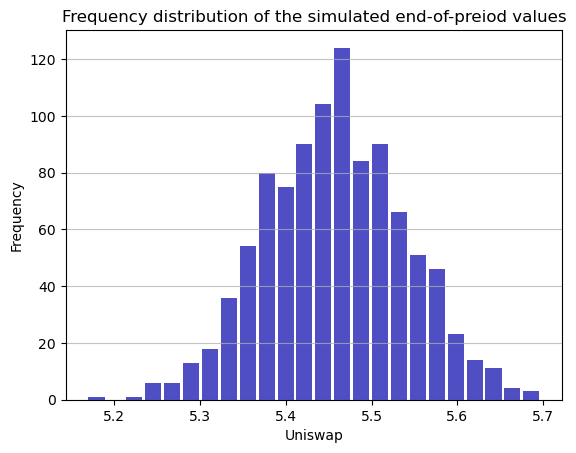

In [545]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Uniswap')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [546]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 0.9088314247984467


# Analysis

In [547]:
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

In [548]:
S=S0       #spot stock price
K=6     #strike
T=3/12     #maturity 
r=0.0432   #US 1 year tbiill
q=0        #dividend yield     
Vol=vol    #volatility or diffusion coefficient
payoff='call' #payoff

In [549]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta


In [550]:
d = delta(S, K, T, r, q, vol,payoff)
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.5285 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.5285 .


In [606]:
S = np.linspace(2, 10, 10)
T = np.linspace(30/365,61/365 ,10)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], K, T[i], r, q, vol, 'call')
        

C:\Users\Litsy\AppData\Local\Temp\ipykernel_35152\3857024986.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


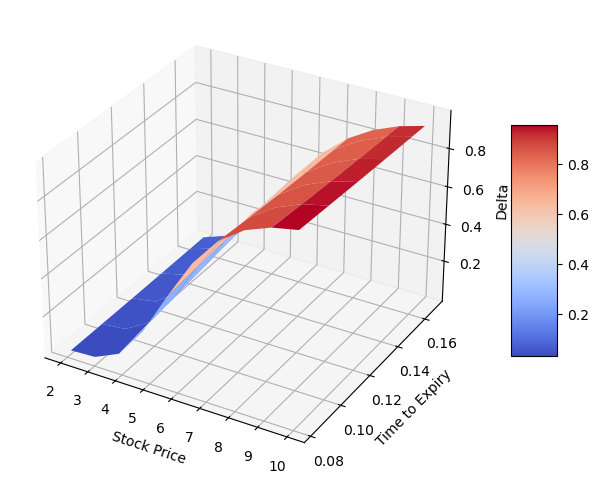

In [607]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [ ]:
S = np.linspace(3,9,11)
Delta_Call = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 6, 0.25, 0.432, 0, 0.129, 'call')

In [ ]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

In [581]:
##Gamma


In [582]:
S=S0      #spot price
K=6    #strike price
T=3/12    #maturity
r=0.0432  # US 1 year tbill
q=0       #dividend yiels
Vol=vol   # volatility
payoff='call' #payoff

In [583]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma


In [584]:
g = gamma(S, K, T, r, q, vol,payoff)
print('The value of Gamma is', g.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', g.round(4), '.')

The value of Gamma is 0.1482 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.1482 .


In [585]:
S = np.linspace(2, 10, 10)
T = np.linspace(30/365,61/365 ,10)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], K, T[i], r, q, vol, 'call')

C:\Users\Litsy\AppData\Local\Temp\ipykernel_35152\3848859912.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


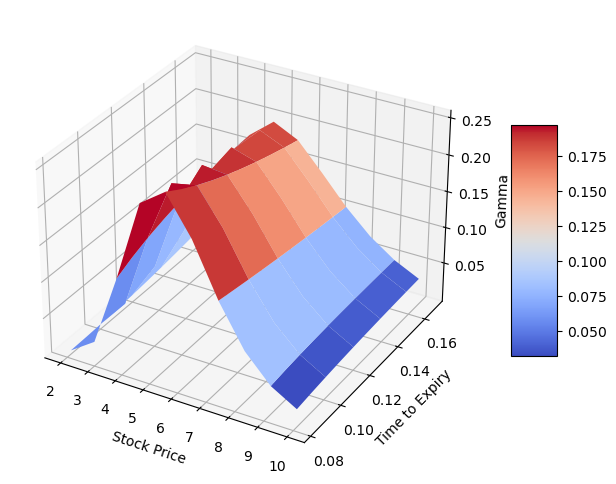

In [586]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [587]:
#Speed

In [588]:
S=S0          #spot price
K=6       #strike price
T=3/12       #maturity
r=0.0432     #US 1 year tbill
q=0          #dividend yield
Vol=vol      #volatility
payoff='call' #payoff

In [589]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [590]:
S1= speed(S, K, T, r, q, vol,payoff)
print('The value of Speed is', S1.round(4),'.','If the stock price increase 1 dollar, then the value of the gamma will increase by ', d.round(4), '.')

The value of Speed is -0.0157 . If the stock price increase 1 dollar, then the value of the gamma will increase by  0.5285 .


In [591]:
S = np.linspace(1, 10, 20)
T = np.linspace(30/365, 61/365, 10)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], K, T[i], r, q, vol, 'call')

C:\Users\Litsy\AppData\Local\Temp\ipykernel_35152\1603304871.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


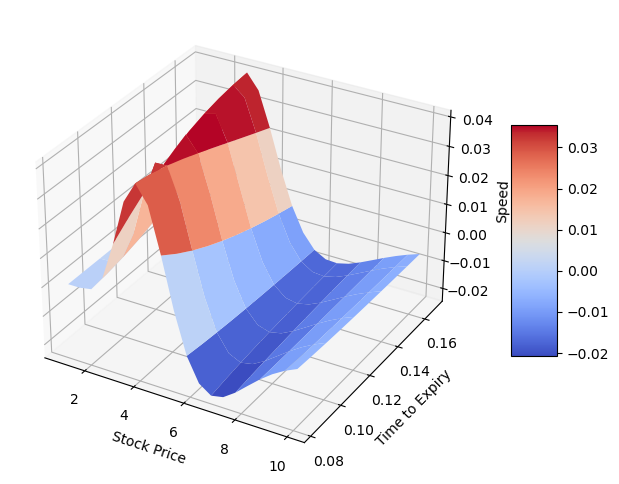

In [592]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [593]:
##theta

In [594]:
S=S0          #spot price
K=6       #strike price
T=3/12        #maturity
r=0.0432      # US 1 year tbiill
q=0           #dividend yield
Vol=vol       #volatility
payoff='call' # payoff

In [595]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [596]:
th = theta (S, K, T, r, q, vol,payoff)
th1 = th/52

In [597]:
print('The value of theta is', th.round(4),'.','If the time increases by 1 week, then the value of the option will increase by $ ', th1.round(4), '.')

The value of theta is 2.2005 . If the time increases by 1 week, then the value of the option will increase by $  0.0423 .


In [598]:
S = np.linspace(2, 10, 11)
T = np.linspace(30/365, 61/365, 11)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], K, T[i], r, q, vol, 'call')

C:\Users\Litsy\AppData\Local\Temp\ipykernel_35152\383283098.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


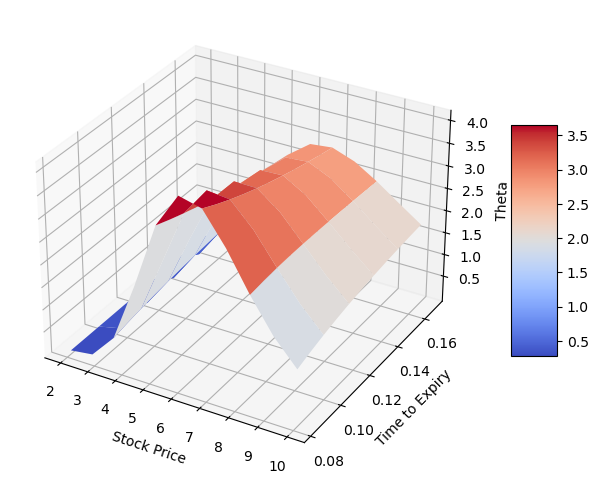

In [599]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [600]:
##vega

In [601]:
S=S0           #spot price
K=6           #strike price     
T=3/12         #maturity
r=0.0432       #US 1 year tbill
q=0            #dividend yiels
Vol=vol        #volatility
payoff='call'  #vega

In [602]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [603]:
v = vega(S, K, T, r, q, vol,payoff)
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4), '.')

The value of Vega is 1.0863 . If the volatility increases 1%, then the value of the option will increase $ 1.0863 .


In [604]:
S = np.linspace(2, 10, 11)
T = np.linspace(30/365, 61/365, 10)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], K, T[i], r, q,vol,'call')

C:\Users\Litsy\AppData\Local\Temp\ipykernel_35152\2704700163.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


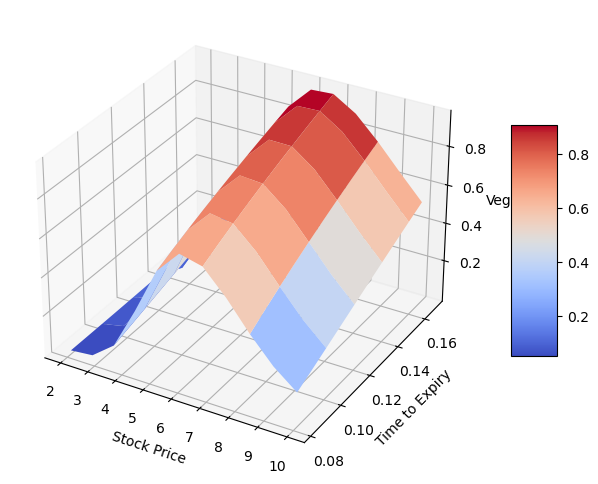

In [605]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);